In [9]:
import cv2
import numpy as np
import requests

IP = 'http://192.168.1.80'
# IP = 'http://192.168.1.88'

In [10]:
import torch
import torchvision
import torch.nn.functional as F

print('setup...')
categories = ['rocks', 'orzo']
device = torch.device('cuda')
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, 2)
model = model.to(device)
model.load_state_dict(torch.load('we_ball.pth'))
model.eval()
print('setup complete!')


def handler(image):
    output = model(image)
    output = F.softmax(output, dim=1).detach().cpu().numpy().flatten()
    for i, score in enumerate(list(output)):
        print(str(i) + " " + str(score))
    print(categories[output.argmax()])
    return output.argmax()

setup...
setup complete!


captured
entering preprocess...
entering hanlder...
0 0.07846487
1 0.92153513
orzo
orzo


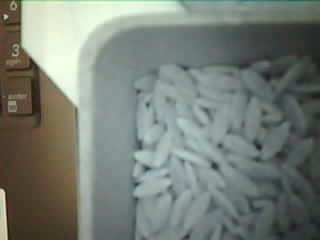

--------------------
captured
entering preprocess...
entering hanlder...
0 0.085663125
1 0.91433686
orzo
orzo


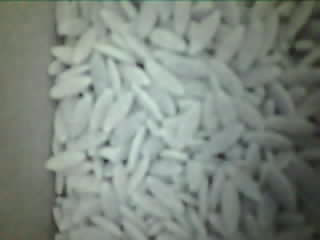

--------------------
captured
entering preprocess...
entering hanlder...
0 0.90170574
1 0.09829423
rocks
rocks


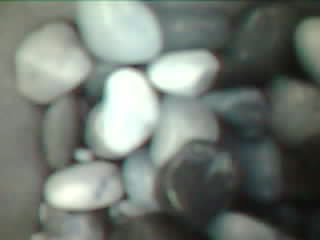

--------------------
captured
entering preprocess...
entering hanlder...
0 0.91628695
1 0.083713055
rocks
rocks


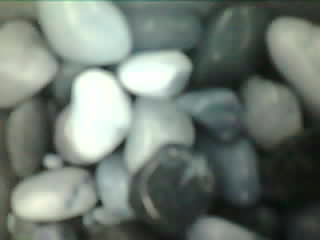

--------------------
captured
entering preprocess...
entering hanlder...
0 0.00097323867
1 0.9990268
orzo
orzo


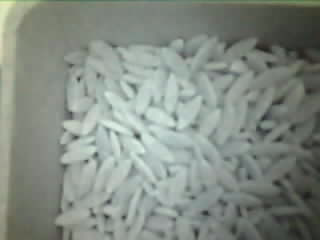

--------------------
captured
entering preprocess...
entering hanlder...
0 0.91956806
1 0.0804319
rocks
rocks


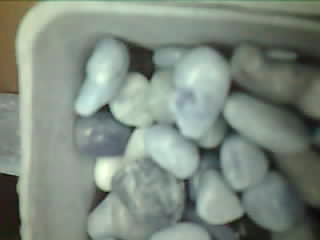

--------------------


KeyboardInterrupt: 

In [11]:
import traitlets
import ipywidgets.widgets as widgets
from IPython.display import display
import PIL
from time import sleep
from utils import preprocess

while True:
    cap = cv2.VideoCapture(IP + ":81/stream")
    if cap.isOpened():
        print("captured")
        ret, frame = cap.read()
    else:
        print("failed capture")

    print('entering preprocess...')
    picture = preprocess(frame)
    
    print('entering hanlder...')
    print(categories[handler(picture)])

    display(PIL.Image.fromarray(frame, mode="RGB"))
    
    cap.release()
    cv2.destroyAllWindows()
    
    print('--------------------')
    sleep(2)